# TASK # 1
# Exploratory Data Analysis (EDA) of the Titanic Dataset

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# EDA

In [9]:
# Load the dataset
titanic = pd.read_csv('Titanic-Dataset.csv')
# Display basic information
print("=== Dataset Information ===")
titanic

=== Dataset Information ===


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
# Display first few rows
print("\n=== First 5 Rows ===")
titanic.head()


=== First 5 Rows ===


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Check for missing values
print("\n=== Missing Values ===")
print(titanic.isnull().sum())


=== Missing Values ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Handle missing values
age_imputer = SimpleImputer(strategy='median')
titanic['Age'] = age_imputer.fit_transform(titanic[['Age']])

# Cabin Col removed
titanic.drop('Cabin', axis=1, inplace=True)

print(titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [38]:

titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
print(titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [39]:
# Check for duplicates
print("\n=== Number of Duplicates ===")
print(titanic.duplicated().sum())




=== Number of Duplicates ===
0


In [40]:
# Identify and manage outliers
print("\n=== Outlier Detection ===")
numeric_cols = ['Age', 'Fare']
for col in numeric_cols:
    q1 = titanic[col].quantile(0.25)
    q3 = titanic[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = titanic[(titanic[col] < lower_bound) | (titanic[col] > upper_bound)]
    print(f"\nNumber of outliers in {col}: {len(outliers)}")
    print(f"Outliers range: {outliers[col].min()} to {outliers[col].max()}")



=== Outlier Detection ===

Number of outliers in Age: 66
Outliers range: 0.42 to 80.0

Number of outliers in Fare: 116
Outliers range: 66.6 to 512.3292


# Visualizations

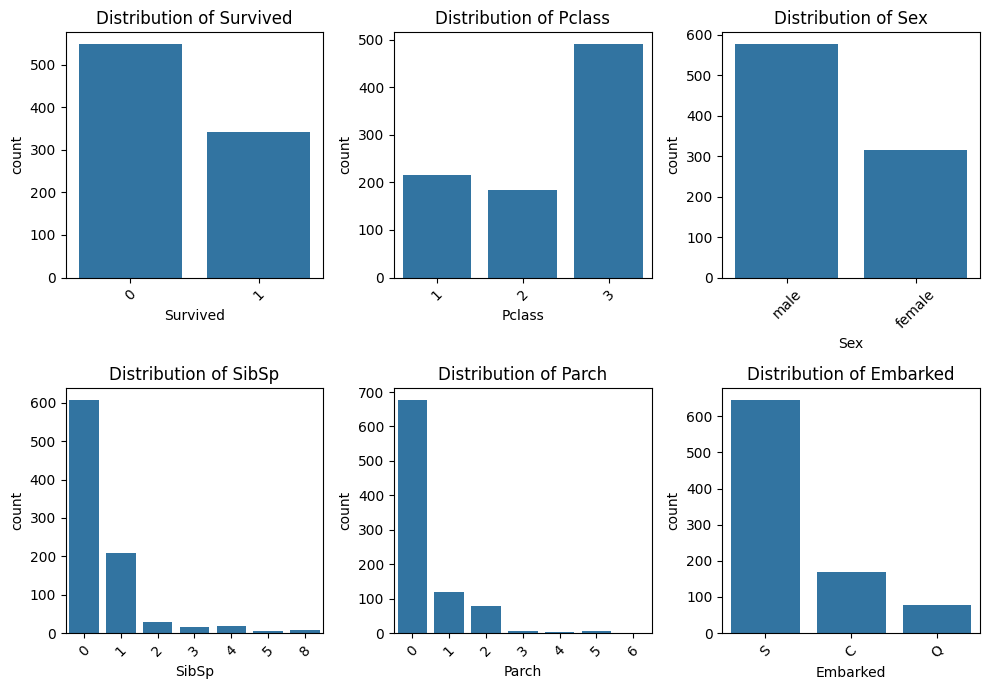

In [ ]:
# Bar charts for categorical variables
categorical_cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

plt.figure(figsize=(10, 7))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=titanic, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

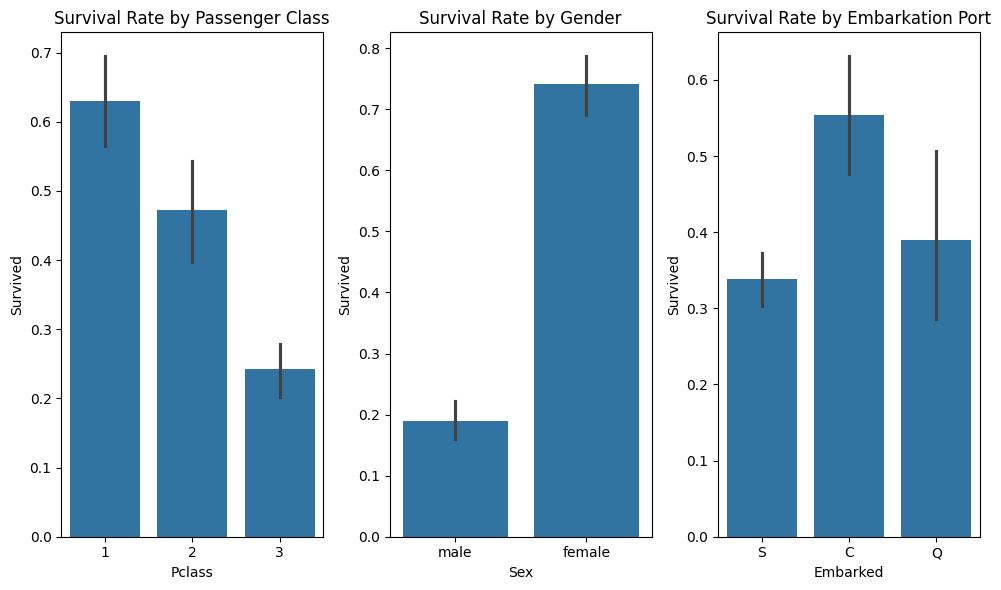

In [51]:
# Survival rate by different categories
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
sns.barplot(data=titanic, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')

plt.subplot(1, 3, 2)
sns.barplot(data=titanic, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')

plt.subplot(1, 3, 3)
sns.barplot(data=titanic, x='Embarked', y='Survived')
plt.title('Survival Rate by Embarkation Port')
plt.tight_layout()
plt.show()


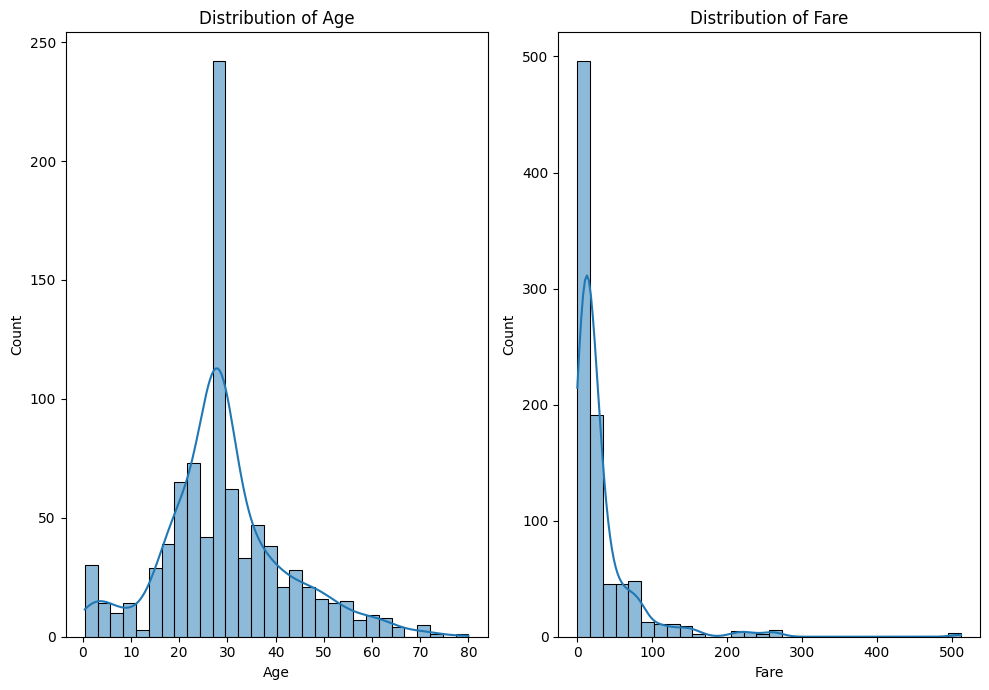

In [47]:
# Histograms for numeric distributions
numeric_cols = ['Age', 'Fare']

plt.figure(figsize=(10, 7))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 2, i)
    sns.histplot(data=titanic, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

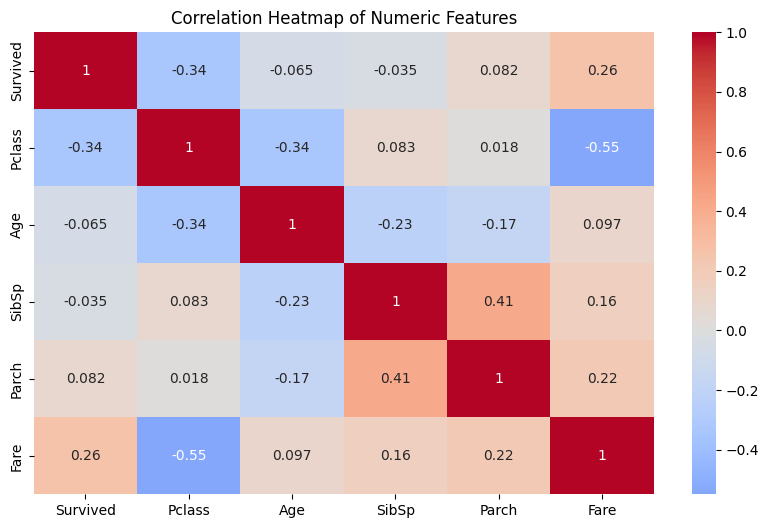

In [49]:
# Correlation heatmap for numeric features
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr_matrix = titanic[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Insights:

### 1. Passenger Demographics:
   - The dataset contains information on 891 passengers.
   - Age ranges from 0.42 to 80 years, with median age of 28.
   - Most passengers were male (65%).
   - The majority were in 3rd class (55%), followed by 1st (24%) and 2nd class (21%).

### 2. Survival Analysis:
   - Overall survival rate was 38%.
   - Survival rates were significantly higher for:
     * 1st class passengers (63%) vs 3rd class (24%)
     * Females (74%) vs males (19%)
   - Children (age < 10) had higher survival rates than other age groups.
   - Passengers who embarked at Cherbourg (C) had higher survival rates (55%) than other ports.

### 3. Fare and Class:
   - There's a strong negative correlation between Pclass and Fare (-0.55), meaning higher classes paid more.
   - Several fare outliers exist, with maximum fare at $512.

### 4. Family Relationships:
   - Most passengers traveled alone (68% had no siblings/spouses, 76% had no parents/children).
   - Passengers with 1-2 family members had slightly higher survival rates than those alone or with large families.

### 5. Missing Data:
   - Age had 177 missing values (imputed with median).
   - Cabin had too many missing values (687) and was dropped.
   - Embarked had 2 missing values (imputed with mode).

### 6. Outliers:
   - Age: Some very young passengers (infants) and a few elderly (up to 80 years).
   - Fare: Several high fare payers, likely 1st class passengers with premium tickets.

### 7. Correlations:
   - Positive correlation between Fare and Survival (0.26)
   - Negative correlation between Pclass and Survival (-0.34)
   - Weak negative correlation between Age and Survival (-0.08)

### 8. Visualizations Created:
#### -1 Bar charts showing distributions of:

   - Survival status

   - Passenger class

   - Gender

   - Number of siblings/spouses

   - Number of parents/children

   - Embarkation port


#### -2 Histograms showing distributions of:

   - Age (with KDE)

   - Fare (with KDE)

   - Age distribution by survival status

   - Correlation heatmap showing relationships between numeric features
#### -3 Survival rate comparisons by:

   - Passenger class
   - Gender
   - Embarkation port